In [1]:
#Instalando bibliotecas 
!pip install pyowm==2.10.0

     |████████████████████████████████| 3.8MB 27.2MB/s 


In [2]:
#Importando bibliotecas 
import pyowm 
import requests, json
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
link = "http://api.openweathermap.org/data/2.5/forecast?q="
#Escolhendo a cidade (Para incluir cidade com nome composto basta usar +, ex: Rio+de+Janeiro)
cidade = "Pelotas"
pais = ",BR,"
chave_de_acesso = "&appid=" + "Inserir o a Key da sua API, cadastro realizado no https://openweathermap.org/api"
unidade = "&units=metric"
previsão_cidade = link + cidade + pais + chave_de_acesso + unidade
print(previsão_cidade)

http://api.openweathermap.org/data/2.5/forecast?q=Pelotas,BR,&appid=aa176b35de67c6dc056233723f91bbe2&units=metric


In [7]:
forecast_json_data = requests.get(previsão_cidade).json()

In [8]:
#Criando vetores para extração os dados
df_predictions = pd.DataFrame()
prediction_num = 0
list_prediction_num = []
date_time_prediction = []
owm_city_id = []
city_name = []
timezone = [] 
temp_prediction = []
temp_feels_like_prediction = []
temp_min_prediction = []
temp_max_prediction = []
pressure_prediction = []
sea_level_prediction = []
grnd_level_prediction = []
humidity_prediction = []
temp_kf_prediction = []
main_weather_prediction = []
main_weather_description_prediction = []
clouds_prediction = []
wind_speed_prediction = []
wind_degree_prediction = []
# Loop por meio do JSON
for num_forecasts in forecast_json_data['list']:
    df_predictions['prediction_num'] = prediction_num
    list_prediction_num.append(prediction_num)
    date_time_prediction.append(forecast_json_data['list'][prediction_num]['dt_txt'])
    
    owm_city_id.append(forecast_json_data['city']['id'])
    city_name.append(forecast_json_data['city']['name'])
    
    if forecast_json_data['city']['timezone'] >0 :
        timezone.append("+" + str((forecast_json_data['city']['timezone'])/3600))
    else:
        timezone.append((forecast_json_data['city']['timezone'])/3600)

    temp_prediction.append(forecast_json_data['list'][prediction_num]['main']['temp'])
    temp_feels_like_prediction.append(forecast_json_data['list'][prediction_num]['main']['feels_like'])
    temp_min_prediction.append(forecast_json_data['list'][prediction_num]['main']['temp_min'])
    temp_max_prediction.append(forecast_json_data['list'][prediction_num]['main']['temp_max'])
    pressure_prediction.append(forecast_json_data['list'][prediction_num]['main']['pressure'])
    sea_level_prediction.append(forecast_json_data['list'][prediction_num]['main']['sea_level'])
    grnd_level_prediction.append(forecast_json_data['list'][prediction_num]['main']['grnd_level'])
    humidity_prediction.append(forecast_json_data['list'][prediction_num]['main']['humidity'])
    temp_kf_prediction.append(forecast_json_data['list'][prediction_num]['main']['temp_kf'])
    main_weather_prediction.append(forecast_json_data['list'][prediction_num]['weather'][0]['main'])
    main_weather_description_prediction.append(forecast_json_data['list'][prediction_num]['weather'][0]['description'])
    clouds_prediction.append(forecast_json_data['list'][prediction_num]['clouds']['all'])
    wind_speed_prediction.append(forecast_json_data['list'][prediction_num]['wind']['speed'])
    wind_degree_prediction.append(forecast_json_data['list'][prediction_num]['wind']['deg'])
    
    prediction_num += 1

# Inserindo valores extraidos do link para um DataFrame
df_predictions['Data_previsão'] = date_time_prediction
df_predictions['Cidade'] = city_name
df_predictions['temperatura_prevista'] = temp_prediction
df_predictions['temp_min_prevista'] = temp_min_prediction
df_predictions['temp_max_prevista'] = temp_max_prediction
df_predictions['pressão_prevista'] = pressure_prediction
df_predictions['umidade prevista'] = humidity_prediction
df_predictions['Previsão'] = main_weather_prediction
df_predictions['Descrição da previsão'] = main_weather_description_prediction
df_predictions['nuvens_previstas'] = clouds_prediction
df_predictions['Velocidade do Vento'] = wind_speed_prediction
df_predictions['Direção do vento'] = wind_degree_prediction
df_predictions.head()
dado_p = df_predictions.drop(columns=['prediction_num'])

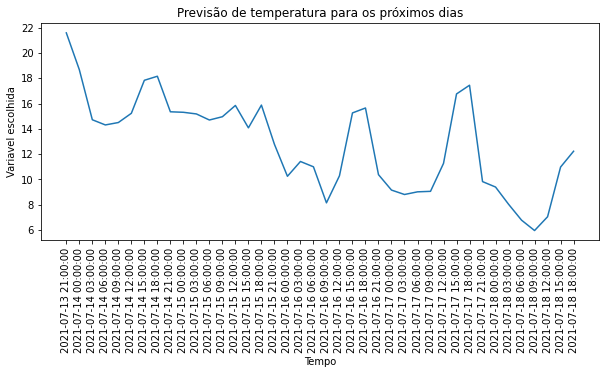

In [9]:
#Plotando tendencia de temperatura para os próximas dias

#Escolhendo variaveis disponíveis abaixo.
t=dado_p['temperatura_prevista']
tim=dado_p['Data_previsão']
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
plt.xlabel('Tempo') 
plt.ylabel('Variavel escolhida') 
plt.title("Previsão de temperatura para os próximos dias")
plt.plot(tim,t)

In [10]:
#Escolha dos dias para a plotagem da previsão
#1°Dia
selecao1 = (dado_p['Data_previsão'] >= '2021-07-14 00:00:00	') & (dado_p['Data_previsão'] <= '2021-07-14 21:00:00	').values
prev_1 = dado_p[selecao1]
#2°Dia
selecao2 = (dado_p['Data_previsão'] >= '2021-07-15 00:00:00	') & (dado_p['Data_previsão'] <= '2021-07-15 21:00:00	').values
prev_2 = dado_p[selecao2]
#3°Dia
selecao3 = (dado_p['Data_previsão'] >= '2021-07-16 00:00:00	') & (dado_p['Data_previsão'] <= '2021-07-16 21:00:00	').values
prev_3 = dado_p[selecao3]

In [14]:
#Visualizando previsão selecionada
prev_3

,Data_previsão,Cidade,temperatura_prevista,temp_min_prevista,temp_max_prevista,pressão_prevista,umidade prevista,Previsão,Descrição da previsão,nuvens_previstas,Velocidade do Vento,Direção do vento
18,2021-07-16 03:00:00,Pelotas,11.42,11.42,11.42,1020,83,Clouds,broken clouds,80,1.01,282
19,2021-07-16 06:00:00,Pelotas,11.00,11.00,11.00,1019,83,Clouds,broken clouds,77,1.42,282
20,2021-07-16 09:00:00,Pelotas,8.15,8.15,8.15,1020,94,Clear,clear sky,0,1.33,238
21,2021-07-16 12:00:00,Pelotas,10.29,10.29,10.29,1021,85,Clear,clear sky,0,0.83,246
22,2021-07-16 15:00:00,Pelotas,15.26,15.26,15.26,1021,62,Clear,clear sky,0,1.33,100
23,2021-07-16 18:00:00,Pelotas,15.65,15.65,15.65,1018,58,Clear,clear sky,0,2.70,83
24,2021-07-16 21:00:00,Pelotas,10.38,10.38,10.38,1018,84,Clear,clear sky,0,2.57,68


In [15]:
#Estraindo temperaturas máximas e mínimas da tambela
a=prev_3['temp_min_prevista'].min()
b=prev_3['temp_max_prevista'].max()
print(a)
print(b)

8.15
15.65


Abaixo foi realizado um código avaliar o desempenho da previsão através de um comparativo com os dados do GFS acima (Cidade escolhida) com os valores inseridos por voce, previsor! 

Obs: Posteriormente, após meus estudos, estarei inserindo ao código o download das estações para validar o comparativo. 

In [16]:
#Comparando previsão com o modelo
dad = []
dad1 = []
dad2 = []
#Criando input dos dados
print('Insira a previsão para amanhã')
tmax = input('Temperatura max: ')
dad.append(float(tmax))
tmin = input('Temperatura min: ')
dad.append(float(tmin))
vv = input('Velocidade do Vento: ')
dad.append(float(vv))
umid = input('Umidade_prevista ')
dad.append(float(umid))

print('Insira a previsão para depois de amanhã')
tmax1 = input('Temperatura max +2°dia: ')
dad1.append(float(tmax1))
tmin1 = input('Temperatura min +2°dia: ')
dad1.append(float(tmin1))
vv1 = input('Velocidade do Vento +2°dia: ')
dad1.append(float(vv1))
umid1 = input('Umidade_prevista +2°dia ')
dad1.append(float(umid1))

print('Insira a previsão para daqui 3 dias')
tmax2 = input('Temperatura max +3°dia: ')
dad2.append(float(tmax2))
tmin2 = input('Temperatura min +3°dia: ')
dad2.append(float(tmin2))
vv2 = input('Velocidade do Vento +3°dia: ')
dad2.append(float(vv2))
umid2 = input('Umidade_prevista +3°dia ')
dad2.append(float(umid2))

#Acrescentendo variavéis de previsão

var =['Temperatura max:','Temperatura min:','Velocidade do Vento (dia)','Média da Umidade_prevista (dia)']
var = pd.DataFrame({'Var':var}) 
dad=pd.DataFrame(dad)
r_dad = pd.concat([var,dad], axis=True)

var1=['Temperatura max:','Temperatura min:','Velocidade do Vento (dia)','Média da Umidade_prevista (dia)']
var1 = pd.DataFrame({'Var':var1}) 
dad1=pd.DataFrame(dad1)
r1_dad = pd.concat([var1,dad1], axis=True)

var2=['Temperatura max:','Temperatura min:','Velocidade do Vento (dia)','Média da Umidade_prevista (dia)']
var2 = pd.DataFrame({'Var':var2}) 
dad2=pd.DataFrame(dad2)
r2_dad = pd.concat([var2,dad2], axis=True)

#Extraindo info do modelo1(GFS)
mod=[]
mod.append(prev_1['temp_max_prevista'].max())  
mod.append(prev_1['temp_min_prevista'].min())
mod.append(prev_1['Velocidade do Vento'].max())
mod.append(prev_1['umidade prevista'].max())
mod = pd.DataFrame({'GFS':mod})
r_dad = pd.concat([var,dad,mod], axis=True)

mod1=[]
mod1.append(prev_2['temp_max_prevista'].max())  
mod1.append(prev_2['temp_min_prevista'].min())
mod1.append(prev_2['Velocidade do Vento'].max())
mod1.append(prev_2['umidade prevista'].max())
mod1 = pd.DataFrame({'GFS':mod1})
r1_dad = pd.concat([var1,dad1,mod1], axis=True)

mod2=[]
mod2.append(prev_2['temp_max_prevista'].max())  
mod2.append(prev_3['temp_min_prevista'].min())
mod2.append(prev_3['Velocidade do Vento'].max())
mod2.append(prev_3['umidade prevista'].mean())
mod2 = pd.DataFrame({'GFS':mod2})
r2_dad = pd.concat([var2,dad2,mod2], axis=True)

#Calculo percentual entre as os dados 
a=(((r_dad['GFS']-r_dad[0])/r_dad[0])*100)
a = pd.DataFrame({'Percentual de diferença':a})
r_dad = pd.concat([var,dad,mod,a], axis=True)

a1=(((r1_dad['GFS']-r_dad[0])/r_dad[0])*100)
a1 = pd.DataFrame({'Percentual de diferença':a1})
r1_dad = pd.concat([var1,dad1,mod1,a1], axis=True)

a2=(((r2_dad['GFS']-r_dad[0])/r_dad[0])*100)
a2 = pd.DataFrame({'Percentual de diferença':a2})
r2_dad = pd.concat([var2,dad2,mod2,a2], axis=True)
#Visualizando os resultados 
print(r_dad)
print(r1_dad)
print(r2_dad)

Insira a previsão para amanhã
Temperatura max: 20
Temperatura min: 11
Velocidade do Vento: 4
Umidade_prevista 80
Insira a previsão para depois de amanhã
Temperatura max +2°dia: 20
Temperatura min +2°dia: 10
Velocidade do Vento +2°dia: 25
Umidade_prevista +2°dia 20
Insira a previsão para daqui 3 dias
Temperatura max +3°dia: 20
Temperatura min +3°dia: 07
Velocidade do Vento +3°dia: 04
Umidade_prevista +3°dia 5
                               Var     0    GFS  Percentual de diferença
0                 Temperatura max:  20.0  18.16                -9.200000
1                 Temperatura min:  11.0  14.31                30.090909
2        Velocidade do Vento (dia)   4.0   4.67                16.750000
3  Média da Umidade_prevista (dia)  80.0  97.00                21.250000
                               Var     0    GFS  Percentual de diferença
0                 Temperatura max:  20.0  15.88               -20.600000
1                 Temperatura min:  10.0  12.78                16.181818
2   

In [17]:
#Posterior adicionar previsão das estações selecionadas